![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [56]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load and inspect Netflix data
netflix_df =  pd.read_csv("netflix_data.csv", index_col=0)
netflix_df[:5]

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [58]:
# Subset dataframe for movies
netflix_subset = netflix_df[netflix_df["type"]=="Movie"]
netflix_subset[:5]

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [59]:
# Subset the necessary columns of the dataframe
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies[:5]

,title,country,genre,release_year,duration
show_id,,,,,
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
s7,122,Egypt,Horror Movies,2019,95


In [60]:
# Filter movies that have duration less than 60 mins
short_movies = netflix_movies[netflix_movies["duration"]<60]
short_movies[:20]

,title,country,genre,release_year,duration
show_id,,,,,
s36,#Rucker50,United States,Documentaries,2016,56
s56,100 Things to do Before High School,United States,Uncategorized,2014,44
s68,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
s102,3 Seconds Divorce,Canada,Documentaries,2018,53
s147,A 3 Minute Hug,Mexico,Documentaries,2019,28
s163,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
s172,A Family Reunion Christmas,United States,Uncategorized,2019,29
s178,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
s179,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22


In [61]:
# Get unique values in genre column
netflix_movies.genre.unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [62]:
# Assign colors to movie genres
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre']=="Children":
        colors.append("blue")
    elif row['genre']=="Documentaries":
        colors.append("green")
    else:
        colors.append("grey")
    
print(colors)

['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'green', 'green', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'green', 'blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'blue', 'green', 'blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'blue', 'grey', '

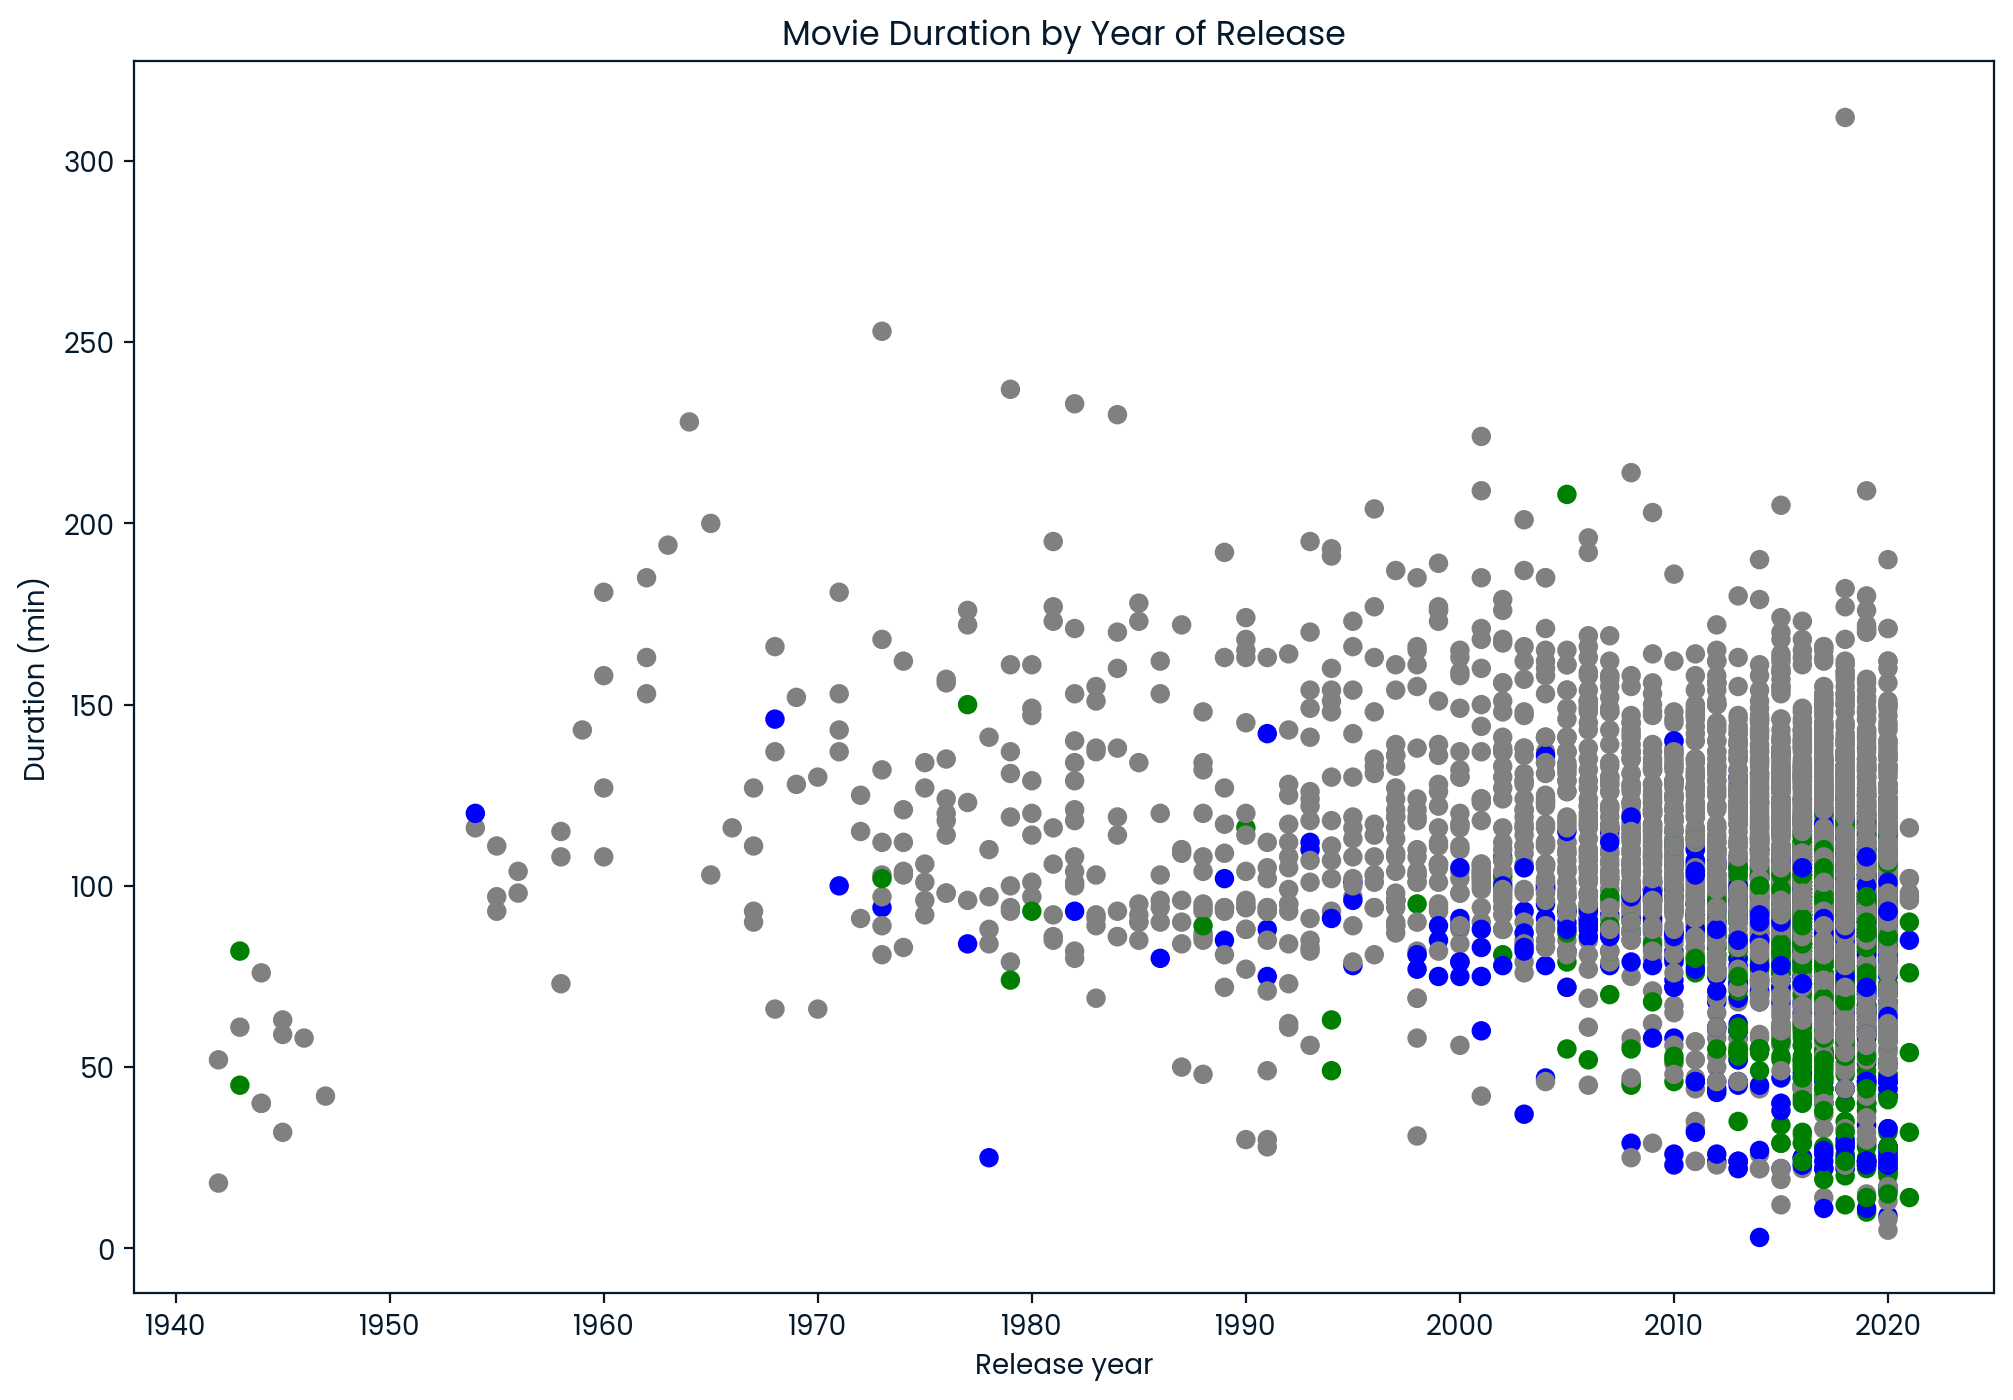

In [63]:
# Plot movie duration by year using genre colors created
fig = plt.figure(figsize=(12,8))

# Create scatter plot
plt.scatter(netflix_movies["release_year"], netflix_movies["duration"], c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show chart
plt.show()

Non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot.

In [64]:
# Answer question: "Are we certain that movies are getting shorter?"

answer = "no"